# Apriori Implementation and Evaluation/Visualization

This notebook contains the implementation of Apriori Rule Mining, where we create a CSV of the rules generate, as well as analyze it through stats and visual representations.

In [598]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

df_onehot = pd.read_csv('../data/transactions_onehot.csv')

In [599]:
item_support = df_onehot.mean()

print(item_support.sort_values(ascending=False).head(10))
print(item_support.describe())

Anxiety_Present       0.759511
Improve               0.747283
Low-Medium            0.630435
Depression_Present    0.622283
Depression_Absent     0.377717
High Hours            0.369565
Rock                  0.255435
Anxiety_Absent        0.240489
No effect             0.229620
Pop                   0.154891
dtype: float64
count    22.000000
mean      0.227273
std       0.248908
min       0.023098
25%       0.047554
50%       0.095788
75%       0.341033
max       0.759511
dtype: float64


## Generating Base Rules (Using Apriori)

### 1. Prune Itemsets 
(select only itemsets that appear relevantly in the dataset)

In [600]:
frequent_items = apriori(df_onehot, min_support=0.1, use_colnames=True, max_len=5)
print(f"Frequent Itemsets ({len(frequent_items)} found):\n", 
      frequent_items.sort_values('support', ascending=False))

Frequent Itemsets (62 found):
      support                                           itemsets
1   0.759511                                  (Anxiety_Present)
5   0.747283                                          (Improve)
6   0.630435                                       (Low-Medium)
3   0.622283                               (Depression_Present)
17  0.593750                         (Improve, Anxiety_Present)
..       ...                                                ...
45  0.107337   (No effect, Anxiety_Present, Depression_Present)
57  0.107337                        (Low-Medium, Rock, Improve)
58  0.107337  (Low-Medium, Depression_Absent, Improve, Anxie...
25  0.104620                     (Depression_Absent, No effect)
50  0.100543           (Low-Medium, No effect, Anxiety_Present)

[62 rows x 2 columns]


## 2. Generate Rules (according to metrics)

### **High Support Rules**

In [601]:
rules = association_rules(frequent_items, metric="support", min_threshold=0.05)
support_rules = rules.sort_values('support', ascending=False)

display_cols = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
support_rules.to_csv("../rules/support_rules.csv", index=False)
print(f"\nTotal rules generated: {len(support_rules)}") 
support_rules[display_cols].head(10)


Total rules generated: 230


,antecedents,consequents,support,confidence,lift
13,(Anxiety_Present),(Improve),0.593750,0.781753,1.046128
12,(Improve),(Anxiety_Present),0.593750,0.794545,1.046128
8,(Anxiety_Present),(Depression_Present),0.563859,0.742397,1.193022
9,(Depression_Present),(Anxiety_Present),0.563859,0.906114,1.193022
32,(Improve),(Depression_Present),0.476902,0.638182,1.025550
33,(Depression_Present),(Improve),0.476902,0.766376,1.025550
14,(Low-Medium),(Anxiety_Present),0.470109,0.745690,0.981802
15,(Anxiety_Present),(Low-Medium),0.470109,0.618962,0.981802
43,(Improve),(Low-Medium),0.453804,0.607273,0.963260
42,(Low-Medium),(Improve),0.453804,0.719828,0.963260


>Top Rule: **{Anxiety_Present} $\leftrightarrow$ {Improve}** with Support: ~59%
<br><br>Inference: This is the dominant profile in the dataset. 
This means that nearly 60% of all respondents report both having anxiety and finding that music improves their mental health.

_________

### **High Confidence Rules**

In [602]:
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.5)
confidence_rules = rules.sort_values('confidence', ascending=False)

display_cols = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
confidence_rules.to_csv("../rules/confidence_rules.csv", index=False)
print(f"\nTotal rules generated: {len(confidence_rules)}") 
confidence_rules[display_cols].head(10)


Total rules generated: 112


,antecedents,consequents,support,confidence,lift
107,"(Rock, Improve, Depression_Present)",(Anxiety_Present),0.115489,0.965909,1.271752
92,"(High Hours, Improve, Depression_Present)",(Anxiety_Present),0.191576,0.965753,1.271547
40,"(High Hours, Depression_Present)",(Anxiety_Present),0.233696,0.939891,1.237495
43,"(Improve, Depression_Present)",(Anxiety_Present),0.440217,0.923077,1.215357
56,"(Rock, Depression_Present)",(Anxiety_Present),0.153533,0.918699,1.209593
5,(Depression_Present),(Anxiety_Present),0.563859,0.906114,1.193022
99,"(Low-Medium, Improve, Depression_Present)",(Anxiety_Present),0.248641,0.892683,1.175339
49,"(Low-Medium, Depression_Present)",(Anxiety_Present),0.330163,0.883636,1.163428
54,"(No effect, Depression_Present)",(Anxiety_Present),0.107337,0.858696,1.130590
65,"(Rock, Improve)",(Anxiety_Present),0.145380,0.835938,1.100626


>Top Rule: **{Rock, Improve, Depression_Present} $\rightarrow$ {Anxiety_Present}** with Confidence: ~97%
<br><br>Inference: This rule like tells us that f\if a respondent listens to Rock, suffers from depression, and reports improvement, we can be 97% certain they also suffer from anxiety.
<br><br>*This could mean that depression and high music engagement (especially in Rock/High Hours) are good indicators for the presence of Anxiety.*

### **High Lift Rules**

In [603]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1.2)
lift_rules = rules.sort_values('lift', ascending=False)

display_cols = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
lift_rules.to_csv("../rules/lift_rules.csv", index=False)
print(f"\nTotal rules generated: {len(lift_rules)}") 
lift_rules[display_cols].head(10)


Total rules generated: 38


,antecedents,consequents,support,confidence,lift
5,"(Anxiety_Absent, Improve)",(Depression_Absent),0.116848,0.761062,2.014898
6,(Depression_Absent),"(Anxiety_Absent, Improve)",0.116848,0.309353,2.014898
0,(Depression_Absent),(Anxiety_Absent),0.182065,0.482014,2.004308
1,(Anxiety_Absent),(Depression_Absent),0.182065,0.757062,2.004308
10,(Depression_Absent),"(Low-Medium, Anxiety_Absent)",0.116848,0.309353,1.929521
9,"(Low-Medium, Anxiety_Absent)",(Depression_Absent),0.116848,0.728814,1.929521
8,"(Low-Medium, Depression_Absent)",(Anxiety_Absent),0.116848,0.455026,1.892087
11,(Anxiety_Absent),"(Low-Medium, Depression_Absent)",0.116848,0.485876,1.892087
7,(Anxiety_Absent),"(Depression_Absent, Improve)",0.116848,0.485876,1.797008
4,"(Depression_Absent, Improve)",(Anxiety_Absent),0.116848,0.432161,1.797008


>Top Rule: **{Anxiety_Absent, Improve} $\leftrightarrow$ {Depression_Absent}** with Lift: ~2.01
<br><br>Inference: A 2.01 lift tells us that there is a very strong link between "mental wellness" variables. Meaning individuals without anxiety are twice as likely (2x) to be free of depression than the general population.
<br><br>While mental health struggles are common in the dataset (high support value), the "No Mental Health Concerns" (No Anxiety + No Depression) is distinct in the dataset

______

### **High Leverage Rules**

In [604]:
rules = association_rules(frequent_items, metric="leverage", min_threshold=0.02)
leverage_rules = rules.sort_values('leverage', ascending=False)

display_cols = ['antecedents', 'consequents', 'leverage', 'support', 'confidence']
leverage_rules.to_csv("../rules/leverage_rules.csv", index=False)
print(f"\nTotal rules generated: {len(leverage_rules)}") 
leverage_rules[display_cols].head(10)


Total rules generated: 62


,antecedents,consequents,leverage,support,confidence
0,(Depression_Absent),(Anxiety_Absent),0.091228,0.182065,0.482014
2,(Anxiety_Present),(Depression_Present),0.091228,0.563859,0.742397
3,(Depression_Present),(Anxiety_Present),0.091228,0.563859,0.906114
1,(Anxiety_Absent),(Depression_Absent),0.091228,0.182065,0.757062
22,(Anxiety_Present),"(Improve, Depression_Present)",0.078005,0.440217,0.579606
21,"(Improve, Depression_Present)",(Anxiety_Present),0.078005,0.440217,0.923077
23,(Depression_Present),"(Improve, Anxiety_Present)",0.070737,0.440217,0.707424
20,"(Improve, Anxiety_Present)",(Depression_Present),0.070737,0.440217,0.741419
7,"(Anxiety_Absent, Improve)",(Depression_Absent),0.058856,0.116848,0.761062
8,(Depression_Absent),"(Anxiety_Absent, Improve)",0.058856,0.116848,0.309353


>Top Rule: **{Depression_Absent} $\leftrightarrow$ {Anxiety_Absent}** with Leverage: ~0.09
<br><br>Inference: This rule (being free of both disorders) provides the highest value in co-occurrence above random chance.
<br><br>This means that even though that mental health concerns being present is more common in the data, the "absence" of the two (anxiety AND depression) co-occurs significantly more than if the two conditions appear in the data on their own, and if they are unrelated.

___

### **High Conviction Rules**

In [605]:
rules = association_rules(frequent_items, metric="conviction", min_threshold=1.2)
conviction_rules = rules.sort_values('conviction', ascending=False)

display_cols = ['antecedents', 'consequents', 'conviction', 'support', 'confidence']
conviction_rules.to_csv("../rules/conviction_rules.csv", index=False)
print(f"\nTotal rules generated: {len(conviction_rules)}") 
conviction_rules[display_cols].head(10)


Total rules generated: 50


,antecedents,consequents,conviction,support,confidence
46,"(Rock, Improve, Depression_Present)",(Anxiety_Present),7.054348,0.115489,0.965909
37,"(High Hours, Improve, Depression_Present)",(Anxiety_Present),7.022283,0.191576,0.965753
18,"(High Hours, Depression_Present)",(Anxiety_Present),4.000865,0.233696,0.939891
20,"(Improve, Depression_Present)",(Anxiety_Present),3.126359,0.440217,0.923077
28,"(Rock, Depression_Present)",(Anxiety_Present),2.958016,0.153533,0.918699
9,"(Anxiety_Absent, Improve)",(Depression_Absent),2.604368,0.116848,0.761062
1,(Anxiety_Absent),(Depression_Absent),2.561489,0.182065,0.757062
3,(Depression_Present),(Anxiety_Present),2.561489,0.563859,0.906114
13,"(Low-Medium, Anxiety_Absent)",(Depression_Absent),2.294667,0.116848,0.728814
43,"(Low-Medium, Improve, Depression_Present)",(Anxiety_Present),2.240921,0.248641,0.892683


>Top Rule: **{Rock, Improve, Depression_Present} $\rightarrow$ {Anxiety_Present}** with Conviction: ~7.05
<br><br>Inference: This rule with an extremely high conviction of 7 means that the rule holds true so consistently that it would be incorrect 7 times more often if the variables were independent.
<br><br>This means that it is **rare** to find a **Rock listener with depression** who **does not also have anxiety**.

-----

## **Visualization and Interpretation**

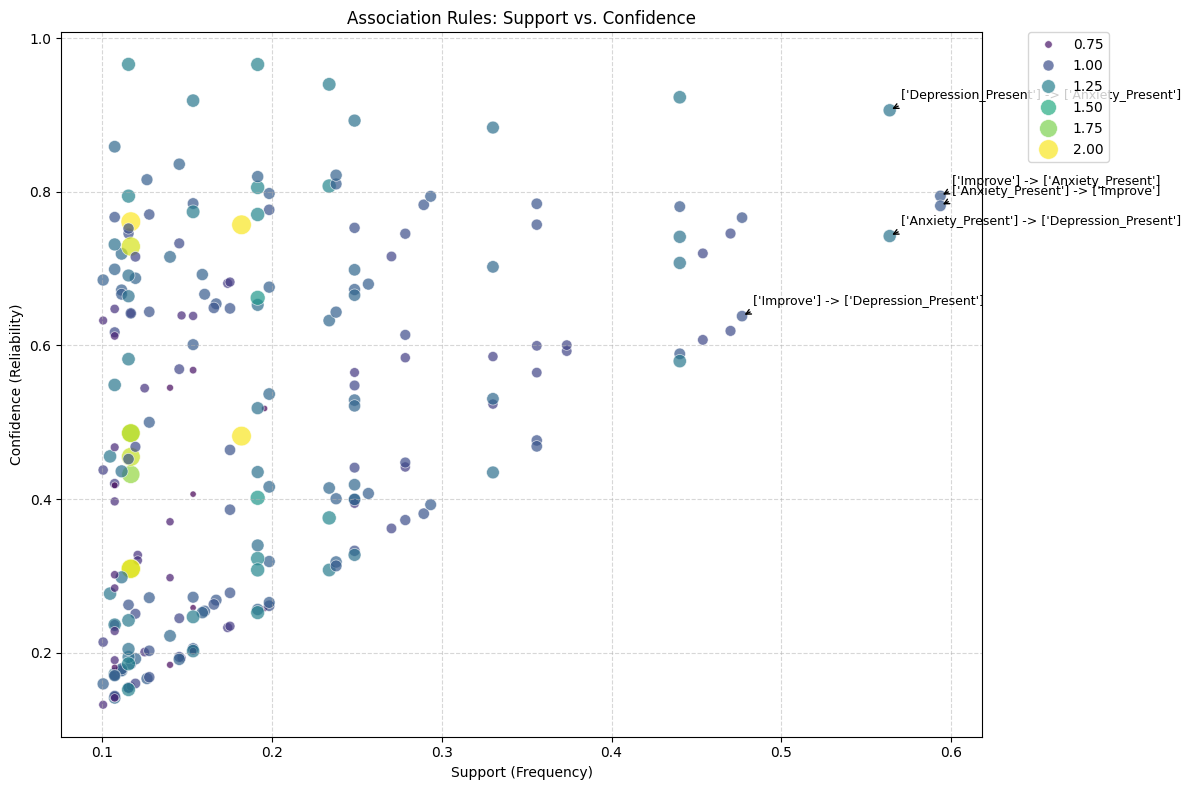

In [606]:
all_rules['rule_name'] = all_rules.apply(lambda x: f"{list(x['antecedents'])} -> {list(x['consequents'])}", axis=1)

# acc to what metric and how many to label
top_rules_to_label = all_rules.sort_values('support', ascending=False).head(5)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=all_rules,
    x="support",
    y="confidence",
    size="lift",
    hue="lift",
    palette="viridis",
    sizes=(20, 200),
    alpha=0.7
)

for i, row in top_rules_to_label.iterrows():
    plt.annotate(
        row['rule_name'],                       
        (row['support'], row['confidence']),     
        xytext=(8, 8),                           
        textcoords='offset points',              
        fontsize=9,
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2") 
    )

plt.title("Association Rules: Support vs. Confidence")
plt.xlabel("Support (Frequency)")
plt.ylabel("Confidence (Reliability)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()